In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

## 1. Import Data

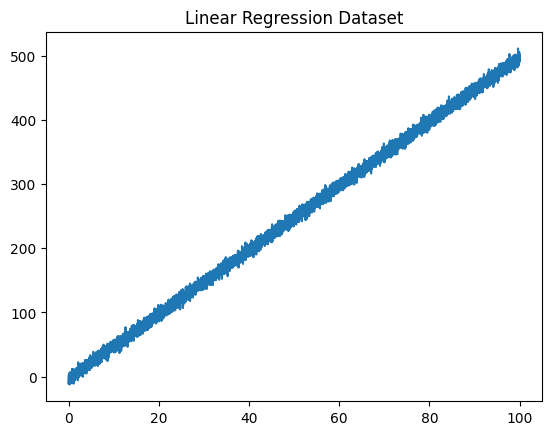

In [6]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x = np.linspace(0,100,n_points)
y = a*x+b

white_noise = np.random.randn(len(x))*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x':x})
target = pd.DataFrame(data={'y':y})
plt.plot(x,y)
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [7]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [8]:
# Train - Test Split
split_point = int(len(x) * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

# train_x = train_x.to_numpy().T
# test_x = test_x.to_numpy().T
# train_y = train_y.to_numpy().T
# test_y = test_y.to_numpy().T

# 3. Prediction

In [9]:
model = NeuralNetworkFromScratch(layers_dims=[1, 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=1e-4, num_iterations=8000, print_cost=True)

Cost after iteration 0: 141.1099549193078
Cost after iteration 1000: 29.246693982549164
Cost after iteration 2000: 24.57930012181577
Cost after iteration 3000: 23.004442040671524
Cost after iteration 4000: 22.56404822549046
Cost after iteration 5000: 22.315626562949785
Cost after iteration 6000: 22.08631635828178
Cost after iteration 7000: 21.94901375160741
Cost after iteration 7999: 17.569112616069177


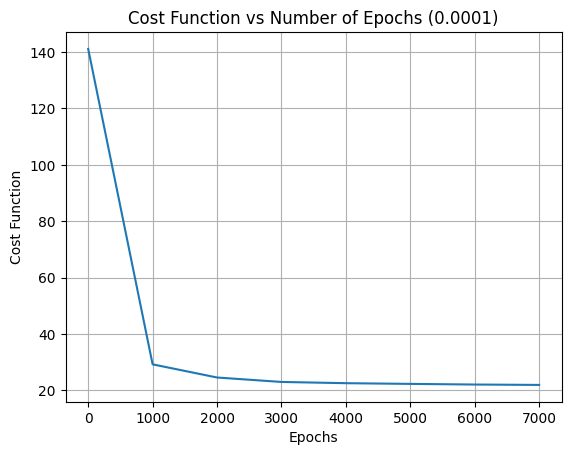

In [10]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, print_cost_function=True)

In [11]:
pred_train = model.predict(train_x, train_y)

RMSE: 21.779493671356736


In [12]:
pred = model.predict(test_x, test_y)

RMSE: 42.52302847730902


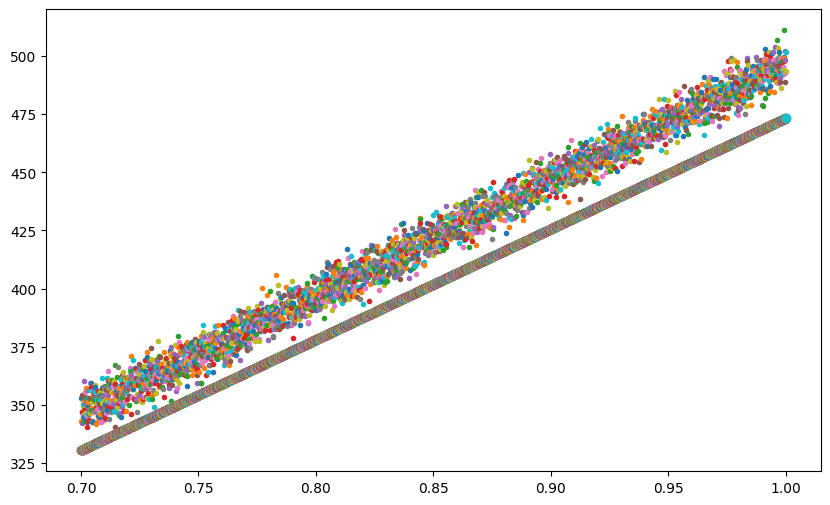

In [25]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.')
plt.plot(test_x, pred.reshape(1,-1), 'o');

# Example 2: Fetch California Housing Dataset

## 1. Import Data

In [ ]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [ ]:
results = pd.DataFrame(data={'actual':test_y[0], 'pred':pred_test[0]})
results.plot(label=['actual', 'pred'])

mape = mean_absolute_percentage_error(test_y, pred_test)
mape